<a href="https://colab.research.google.com/github/LinarKulinar/VortexBeamResearch/blob/main/forming_vortex_beam_master_research_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вихревые оптические пучки
## НИР Ахметов Линар 6133 1 семестр магистратуры
### Тема НИР: Распознавание мультиплексированных вихревых пучков с использованием нейронных сетей



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import math

Определим функцию *f*, которая задает значение поля в точке *(r, phi)* с учётом параметра *m∈ℤ*.:

$ f(r, ϕ) = exp(-r + i \cdot m \cdot ϕ) $

In [2]:
def f (r, phi, m):
  """
  Функция, описывающая входной пучок exp(i*m*phi)
  :param x: координата x точки
  :param y: координата y точки
  :param phi: угол в исходном пучке
  :return (field, x_linspace, y_linspace)
  """
  return math.exp(-r) * (math.cos(m * phi) + math.sin(m * phi)*1j)

И функцию, создающую и вычисляющую значение функции *f(r, ϕ)* в каждой точке квадратного поля размером *(-size, size)*  с числом отсчётов, переданных в кортеже *matrix_shape*

In [3]:
def get_field(size, matrix_shape, m):
  x_linspace = np.linspace(-size, size, matrix_shape[0])
  y_linspace = np.linspace(-size, size, matrix_shape[1])

  field = np.zeros(matrix_shape, dtype=complex)

  for i in range(matrix_shape[0]):
    for j in range(matrix_shape[1]):
      middle = min(matrix_shape) // 2
      di = i - middle
      dj = j - middle
      if abs(di) ** 2 + abs(dj) ** 2 <= middle ** 2:  # Если мы находимся внутри круга с радиусом, равным count/2
        phi = math.atan2(di, dj) # в полярных координатах
        r_coord = math.sqrt(x_linspace[i]**2 + y_linspace[j]**2)
        field[i,j] = f (r_coord, phi, m)
  return (field, x_linspace, y_linspace)

Определим функцию, формирующую изображения пучков из комплексного numpy-массива field

In [4]:
def plot_field(field, x_linspace, y_linspace):
  import matplotlib.cm as cmap
  extent = [np.min(x_linspace), np.max(x_linspace), np.max(y_linspace), np.min(y_linspace)] # для корректных чисел на осях графика

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.absolute(field), cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Амплитуда комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.absolute(field)**2, cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Интенсивность комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

  plt.figure(figsize=(7.5, 6))
  plt.imshow(np.angle(field), cmap=cmap.hot, aspect='auto', extent=extent)
  plt.title("Фаза комплексного поля")
  plt.ylabel('y, расстояние (см)')
  plt.xlabel('x, расстояние (см)')
  plt.grid(True)
  plt.colorbar()
  #plt.savefig("num_i="+str(num_i)+" num_m="+str(num_m)+"/Распредление по радиусу во время 0,5t")
  plt.show()

Вызовем вышеописанные функции для отображения пучка *m = 3* и числом отчётов, равным *101* по горизонтали и вертикали 

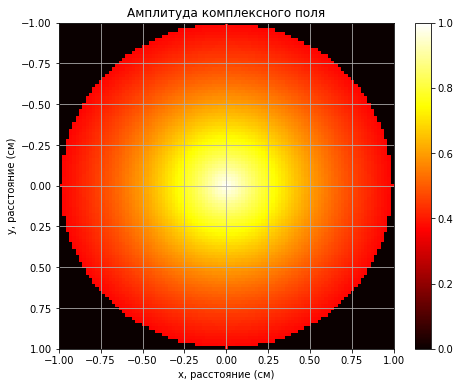

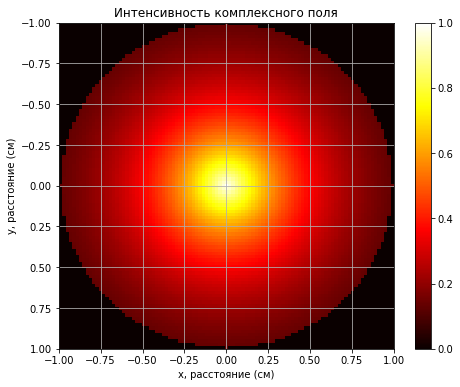

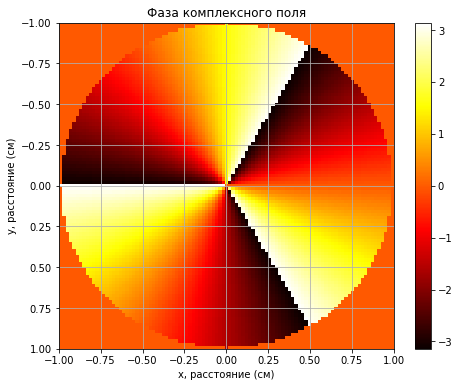

In [5]:
field, x_linspace, y_linspace = get_field(size=1, matrix_shape=(101, 101), m=3)
plot_field(field, x_linspace, y_linspace)

In [6]:
# 3+5 modes vortex beam 
# field_3, x_linspace, y_linspace = get_field(size=1, matrix_shape=(101, 101), m=3)
# field_5, x_linspace, y_linspace = get_field(size=1, matrix_shape=(101, 101), m=5)
# plot_field((field_3 + field_5)/2, x_linspace, y_linspace)

Определим фунццию, вычисляющую комбинацию полей с разными значениями *m*, переданных в переменной *m_array = [1, 4]*

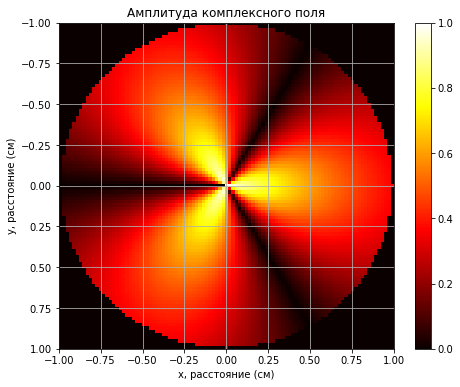

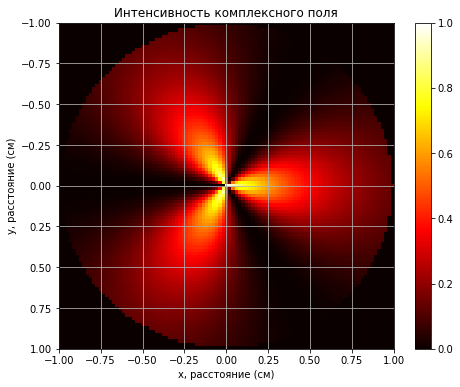

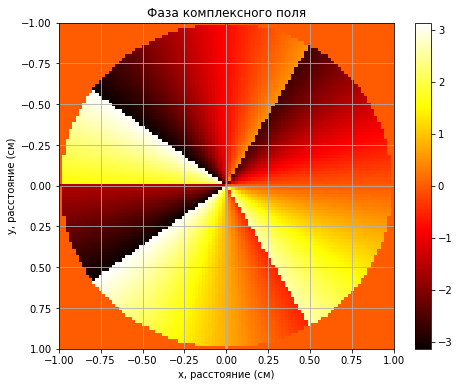

In [7]:
def combination(size, matrix_shape, m_array):
  field = np.zeros(matrix_shape, dtype=complex)
  for m in m_array:
    field_tmp, x_linspace, y_linspace = get_field(size, matrix_shape, m)
    field += field_tmp
  plot_field(field / len(m_array), x_linspace, y_linspace)
  

combination(size=1, matrix_shape=(101, 101), m_array = [1, 4])

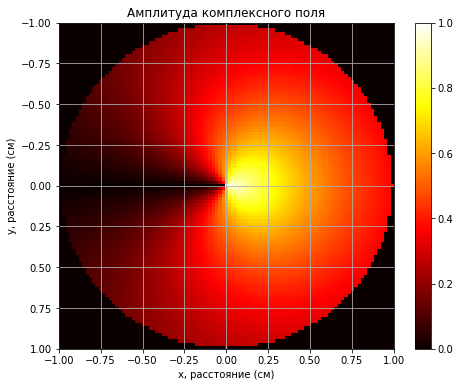

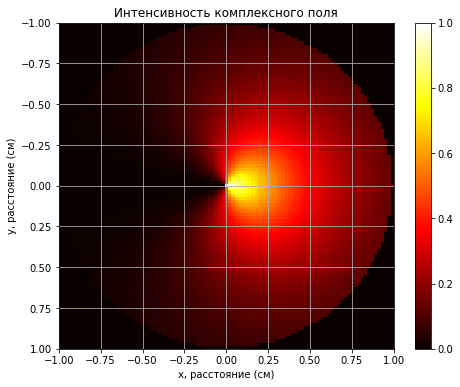

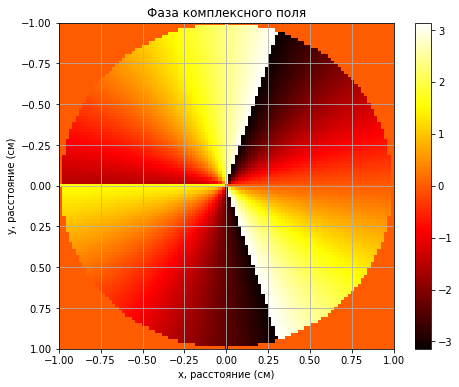

In [8]:
combination(size=1, matrix_shape=(101, 101), m_array = [2, 3])